## Step 1 - Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import glob
import xml.etree.ElementTree as ET
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt


In [18]:
class RNASequences:
    def __init__(self, data_dir="Data/"):
        filenames = glob.glob("*.txt", root_dir=data_dir)
        dfs = []

        for filename in filenames:
            df = pd.read_csv(data_dir + filename, sep="\t", names=[filename[:10]], skiprows=1).T
            dfs.append(df)
        
        self.__rna_counts = pd.concat(dfs)

        self.__annotations = pd.DataFrame(columns=("Subject ID", "Sample Group", "CNS Subregion"))
        tree = ET.parse(open("Data/GSE124439_family.xml"))
        root = tree.getroot()
        namespace = {"ns": "http://www.ncbi.nlm.nih.gov/geo/info/MINiML"}

        for sample in root.findall("ns:Sample", namespace):
            sample_id = sample.attrib["iid"]
            for channel in sample.iterfind(".//ns:Channel", namespace):
                self.__annotations.loc[sample_id] = [
                    channel[4].text.strip(),
                    channel[5].text.strip(),
                    channel[3].text.strip(),
                ]
        
        self.__annotations = self.__annotations
        self.__check_annotations()
    

    def __check_annotations(self):
        assert self.__rna_counts.index.difference(self.__annotations.index).empty


    def _ipython_display_(self):
        display(self.__rna_counts)
        display(self.__annotations)


    def get_counts(self):
        return self.__rna_counts
    

    def get_annotations(self):
        return self.__annotations


    def get_count(self, item):
        if isinstance(item, str):
            return self.__rna_counts[item]
        else:
            return self.__rna_counts.at[item[0], item[1]]
    

    def get_annotation(self, item):
        if isinstance(item, str):
            return self.__annotations[item]
        else:
            return self.__annotations.at[item[0], item[1]]
        

    def get_sample(self, sample=None):
        match sample:
            case "ALS":
                return self.__annotations.loc[self.__annotations["Sample Group"] == "ALS Spectrum MND"]
            case "Control":
                return self.__annotations.loc[self.__annotations["Sample Group"] == "Non-Neurological Control"]
            case "Other":
                return self.__annotations.loc[self.__annotations["Sample Group"] == "Other Neurological Disorders"]
            case _:
                return self.__annotations
            
    
    def get_sample_count(self, sample=None):
        return self.__rna_counts.loc[self.get_sample(sample).index]


    def mean(self, sample=None):
        return self.get_sample_count(sample).mean().to_frame().rename(columns={0: "Means"})
    

    def median(self, sample=None):
        return self.get_sample_count(sample).median().to_frame().rename(columns={0: "Medians"})
    

    def std(self, sample=None):
        return self.get_sample_count(sample).std().to_frame().rename(columns={0: "Standard Deviations"})
    

df = RNASequences()
df

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
GSM3533382,42,189,0,4052,92,201,1,8,76,1,...,1023,2363,2137,1265,100,607,140,551,2269,2233
GSM3533252,37,110,0,4660,102,64,7,1,68,0,...,880,2077,1908,1072,119,478,129,525,1821,1921
GSM3533337,31,110,0,1484,84,60,1,1,12,0,...,656,1357,1345,749,61,341,102,346,1122,1437
GSM3533314,14,41,0,2185,105,198,4,0,24,0,...,958,2017,1817,1087,99,527,145,446,1522,1757
GSM3533391,37,118,0,1245,104,168,1,1,21,1,...,847,1822,1625,903,96,472,120,415,1556,1768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533291,29,142,0,1429,102,115,2,4,14,1,...,671,1526,1319,735,85,394,92,330,1279,1408
GSM3533349,31,142,0,1526,108,122,2,1,139,0,...,758,1724,1575,866,76,427,122,430,1478,1660
GSM3533339,39,95,0,1223,74,89,1,3,39,0,...,687,1424,1340,693,101,354,83,300,1145,1390
GSM3533399,46,179,0,2899,89,109,1,6,46,1,...,796,1694,1488,869,89,469,99,442,1684,1836


,Subject ID,Sample Group,CNS Subregion
GSM3533230,NEUEL133AK6,ALS Spectrum MND,Frontal Cortex
GSM3533231,NEUYV496XLP,ALS Spectrum MND,Frontal Cortex
GSM3533232,NEUZU200WEQ,ALS Spectrum MND,Frontal Cortex
GSM3533233,NEUME287RK2,ALS Spectrum MND,Frontal Cortex
GSM3533234,NEUEC006FND,ALS Spectrum MND,Frontal Cortex
...,...,...,...
GSM3533401,NEUMY028JH4,ALS Spectrum MND,Frontal Cortex
GSM3533402,NEUXR145UBL,ALS Spectrum MND,Frontal Cortex
GSM3533403,NEUKN209FNW,ALS Spectrum MND,Frontal Cortex
GSM3533404,NEUUF289NRL,ALS Spectrum MND,Frontal Cortex


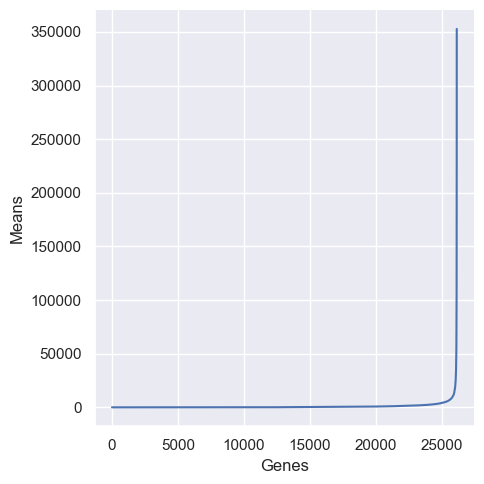

In [14]:
sns.set_theme()

means = rna_sequences.mean(sample="Other")
means = means[means["Means"] != 0.0].sort_values(by="Means")
genes_count = np.arange(len(means.index))
means["Genes"] = genes_count

sns.relplot(data=means, x="Genes", y="Means", kind="line")

,Means
A1BG,38.062500
A1BG-AS1,118.568182
A1CF,0.170455
A2M,2455.403409
A2M-AS1,102.568182
...,...
X8_LINE:CR1:LINE,462.647727
X9_LINE:L1:LINE,110.863636
Zaphod2:hAT-Tip100:DNA,415.931818
Zaphod3:hAT-Tip100:DNA,1555.630682


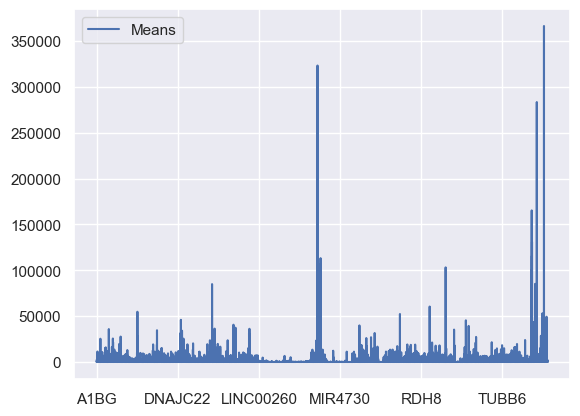

In [54]:
df2 = df.mean()
df2 = df2[df2['Means'] != 0]
dfp = df2.plot()
df2

,Standard Deviations
A1BG,20.511225
A1BG-AS1,48.137849
A1CF,0.662835
A2M,1278.351971
A2M-AS1,35.553998
...,...
X8_LINE:CR1:LINE,129.147228
X9_LINE:L1:LINE,33.597511
Zaphod2:hAT-Tip100:DNA,122.379157
Zaphod3:hAT-Tip100:DNA,462.496696


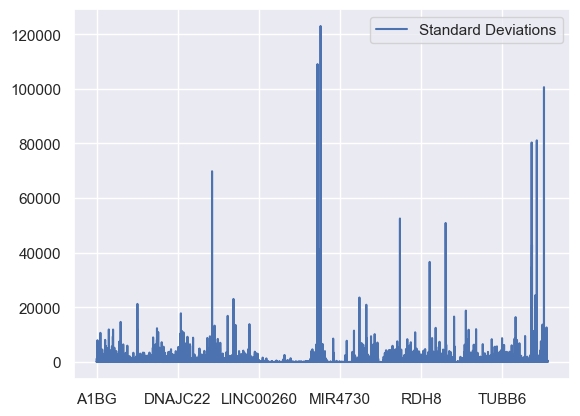

In [55]:
df2 = df.std()
df2 = df2[df2['Standard Deviations'] != 0]
dfp = df2.plot()
df2

,Medians
A1BG,34.0
A1BG-AS1,108.5
A2M,2286.5
A2M-AS1,94.5
A2ML1,122.0
...,...
X8_LINE:CR1:LINE,448.0
X9_LINE:L1:LINE,107.0
Zaphod2:hAT-Tip100:DNA,409.5
Zaphod3:hAT-Tip100:DNA,1562.5


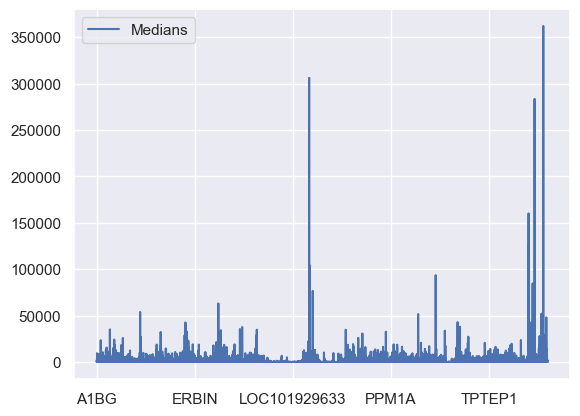

In [56]:
df2 = df.median()
df2 = df2[df2['Medians'] != 0]
dfp = df2.plot()
df2